![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Importación librerías
import numpy as np
from keras import backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [118]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


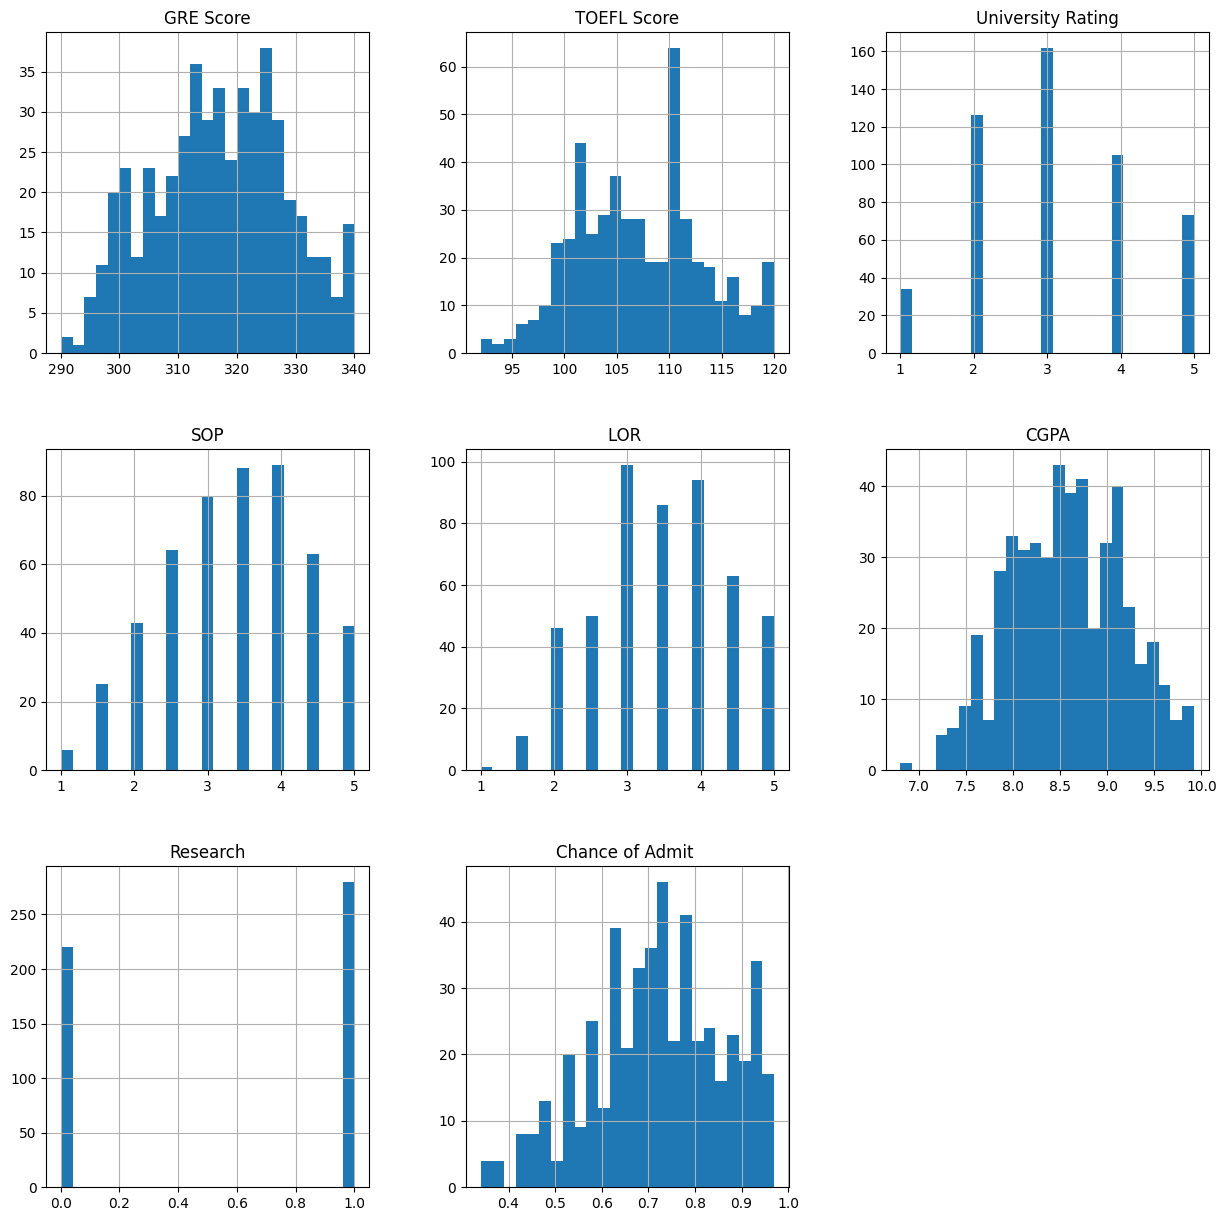

In [119]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [120]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [121]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [122]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [123]:
# Añadimos la normalización en este punto, pero vamos a seguirla usando en el punto 2 y 3

# Normalización de variables predictoras (X) con la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

# Definición de dimensiones de salida y entrada
output_var = 1
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [124]:
# Red neuronal de una sola capa
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


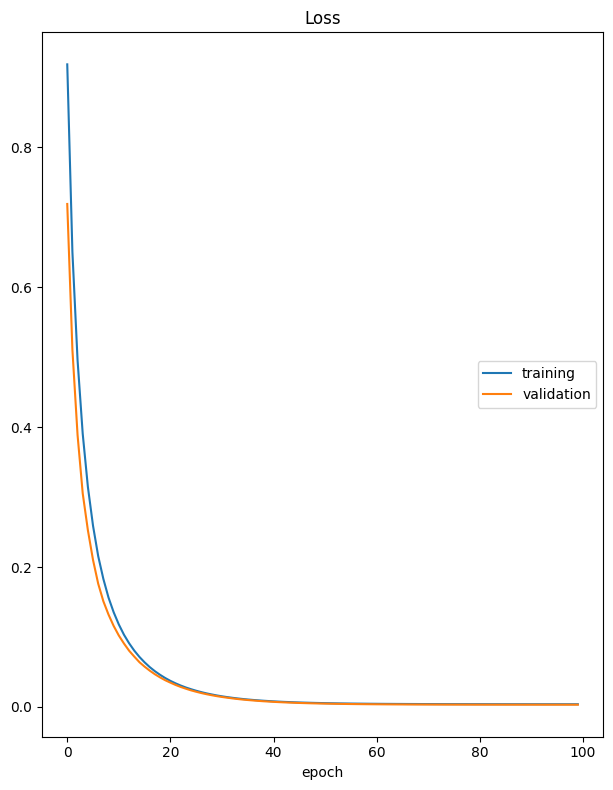

Loss
	training         	 (min:    0.004, max:    0.919, cur:    0.004)
	validation       	 (min:    0.003, max:    0.719, cur:    0.003)
5/5 [==============================] - 0s 2ms/step
Error absoluto medio (MAE): 0.04086712439060212
Error cuadrático medio (MSE): 0.0031120018515213075


In [125]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, Y_train,
          verbose=1,
          epochs=100,
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

# Obtener las predicciones del modelo en el conjunto de test
y_pred = model.predict(X_test)

# Calcular el error absoluto medio (MAE)
mae_nn_single = mean_absolute_error(Y_test, y_pred)
print("Error absoluto medio (MAE):", mae_nn_single)

# Calcular el error cuadrático medio (MSE)
mse_nn_single = mean_squared_error(Y_test, y_pred)
print("Error cuadrático medio (MSE):", mse_nn_single)

## Proceso

1.   Iniciamos normalizando las variables predictoras antes del entrenamiento del modelo utilizando StandardScaler
2. El modelo está definido con un optimizador 'sgd', que es el Stochastic Gradient Descent, ya que consideramos que este problema no tiene una gran complejidad y nos permitiría análizar mejor la incidencia de otros factores en el desempeño de las diferentes redes utilizadas en esta actividad.
3. La función de pérdida está definida con 'mean_squared_error', utilizada comunmente para modelos de regresión, como al que nos estamos enfrentando.
4. Hemos especificado 'mean_squared_error' como una métrica para monitorear durante el entrenamiento.
Hemos entrenado el modelo durante 100 épocas. Podemos observar que luego de la época 20 la funcion de perdida para train y validation es similar.

## Análisis

* Su MAE nos dice que en promedio **las predicciones se encuentran 0.040 puntos alejadas de los valores reales**. Dando así un MSE de 0.003
* Al tener en cuenta **la linealidad de este problema** (vemos que entre mejores puntajes tenga la persona, más probabilidades tiene de ser admitido) una sola capa le agrega suficiente complejidad para tener un buen desempeño predictivo.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [136]:
K.clear_session()

model = Sequential()

model.add(Dense(256, input_shape=(dims,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(output_var))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35073 (137.00 KB)
Trainable params: 35073 (137.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


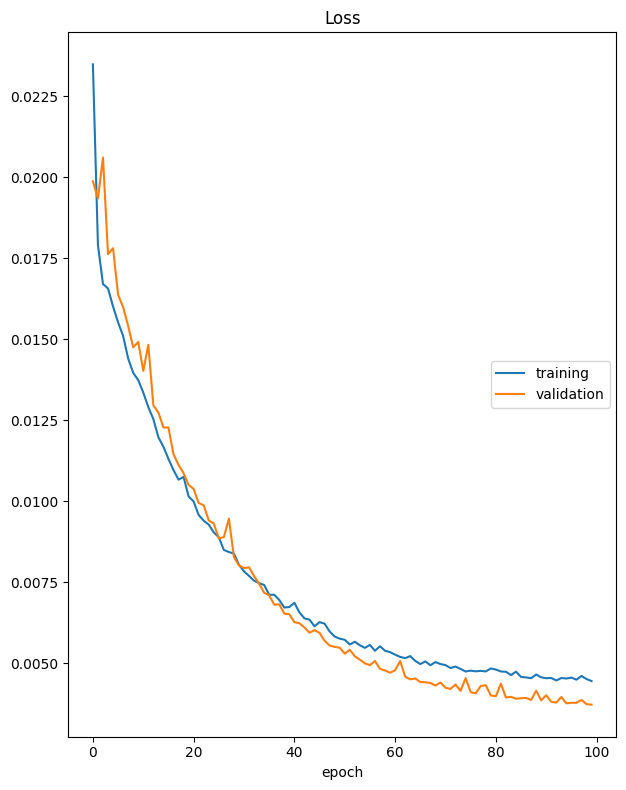

Loss
	training         	 (min:    0.004, max:    0.023, cur:    0.004)
	validation       	 (min:    0.004, max:    0.021, cur:    0.004)
5/5 [==============================] - 0s 3ms/step
Error absoluto medio (MAE): 0.04568490663369496
Error cuadrático medio (MSE): 0.003712823494317584


In [137]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, Y_train,
          verbose=1,
          epochs=100,
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

# Obtener las predicciones del modelo en el conjunto de test
y_pred = model.predict(X_test)

# Calcular el error absoluto medio (MAE)
mae_nn_multi = mean_absolute_error(Y_test, y_pred)
print("Error absoluto medio (MAE):", mae_nn_multi)

# Calcular el error cuadrático medio (MSE)
mse_nn_multi = mean_squared_error(Y_test, y_pred)
print("Error cuadrático medio (MSE):", mse_nn_multi)

## Proceso

1. Para la arquitectura multicap hemos decidido utilizar una arquitectura simple con dos capas:
La primera capa oculta tiene **256 neuronas** y utiliza la **función de activación Sigmoide**. La segunda capa oculta tiene **128 neuronas** con la misma función de activación. Decidimos utilizar la función Sigmoide puesto que los valores de la variable de respuesta se encuentran entre 0 y 1.
2. Hemos reducido el número de neuronas en esta capa para crear gradualmente una representación más compacta de los datos a medida que avanzamos en las capas ocultas.
3. La capa de salida tiene una sola neurona correspondiente al valor de prediccion de la probabilidad de admissión de cada estudiante.
4. Hemos compilado el modelo utilizando la función de pérdida 'mean_squared_error', que es comúnmente utilizada para problemas de regresion. Y porque nos serviría de apoyo para comparar la incidencia de las nuevas capas con respecto al modelo del primer punto.
5. Hemos seleccionado el optimizador 'sgd' (Stochastic Gradient Descent) el cual sirve para actualizar los parámetros del modelo (como los pesos y sesgos) en cada iteración del entrenamiento utilizando el gradiente de la función de pérdida.
6. Hemos especificado 'mean_squared_error' como una métrica para monitorear durante el entrenamiento.
Hemos entrenado el modelo durante 100 épocas. Podemos observar que entre 20 y 40 epocas el la funcion de perdida para train y validation son similares.

## Análisis

* Su MAE nos dice que en promedio **las predicciones se encuentran 0.045 puntos alejadas de los valores reales**. Dando así un MSE de 0.0037. Lo que nos dice que tiene menor redimiento que la red neuronal de una sola capa.
* Al tener en cuenta **la linealidad de este problema** como en el punto anterior, podemos pensar que las redes neuronales, al querer solucionar problemas más complejos con representaciones no lineales, no mejoran la predicción de este problema precisamente porque aprece ser un problema lineal.





## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [138]:
K.clear_session()

model = Sequential()
model.add(Dense(256, input_dim=dims, activation='sigmoid'))
model.add(Dropout(0.2))  # Añadir dropout con una tasa del 20%
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(output_var))
model.compile(optimizer='sgd', loss='mean_squared_error')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35073 (137.00 KB)
Trainable params: 35073 (137.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


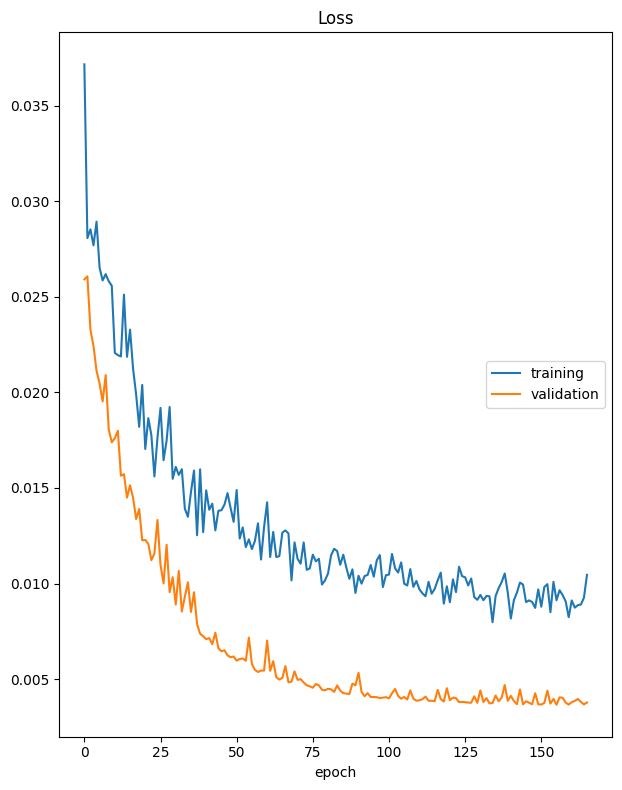

Loss
	training         	 (min:    0.008, max:    0.037, cur:    0.010)
	validation       	 (min:    0.004, max:    0.026, cur:    0.004)
Restoring model weights from the end of the best epoch: 156.
11/11 [==============================] - 0s 45ms/step - loss: 0.0105 - val_loss: 0.0038
Epoch 166: early stopping
5/5 [==============================] - 0s 3ms/step
Error absoluto medio (MAE): 0.044419987519582114
Error cuadrático medio (MSE): 0.0036598003554230664


In [139]:
# Definir EarlyStopping para detener el entrenamiento si la mejora en la validación se detiene durante 10 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con early stopping
model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=200,
          callbacks=[PlotLossesKeras(), best_model, early_stopping])

best_model_loaded = load_model(fBestModel)

# Obtener las predicciones del modelo en el conjunto de test
y_pred = best_model_loaded.predict(X_test)

# Calcular el error absoluto medio (MAE)
mae_nn_dropout = mean_absolute_error(Y_test, y_pred)
print("Error absoluto medio (MAE):", mae_nn_dropout)

# Calcular el error cuadrático medio (MSE)
mse_nn_dropout = mean_squared_error(Y_test, y_pred)
print("Error cuadrático medio (MSE):", mse_nn_dropout)

## Proceso
1. Volvemos a utilzar los datos estandarizados de los puntos anteriores
2. Definimos el mismo modelos, con los mismos parámetros del punto anterior, pero está vez agregandole una capa de **dropout** de 20%. Así podrá ignorar algunos de los outputs de la primera capa oculta y prevenir overfitting.
3. Definimos el early stopping para que pare cuando en 10 época el error de validación no mejore
4. Entrenamos en 200 épocas. Guardamos el mejor modelo y lo cargamos para realizar la predicción y sacar las métricas de desempeño

## Análisis

* Su MAE nos dice que en promedio **las predicciones se encuentran 0.044 puntos alejadas de los valores reales**. Dando así un MSE de 0.0036. Lo que nos dice que tiene mejor redimiento que la red neuronal multicapa sin dropout o early stopping.
* Vemos que al haber agregado early stopping se detiene en la época 166, donde parece que el modelo ya no tiene mejora.
* A pesar de que sus métricas de desempeño son mejores que las de la red neuronal multicapa, siguen sin ser mejores que las de la red neuronal de una sola capa. Esto puede deberse a **la linealidad de este problema** como hemos explicado en puntos anteriores.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

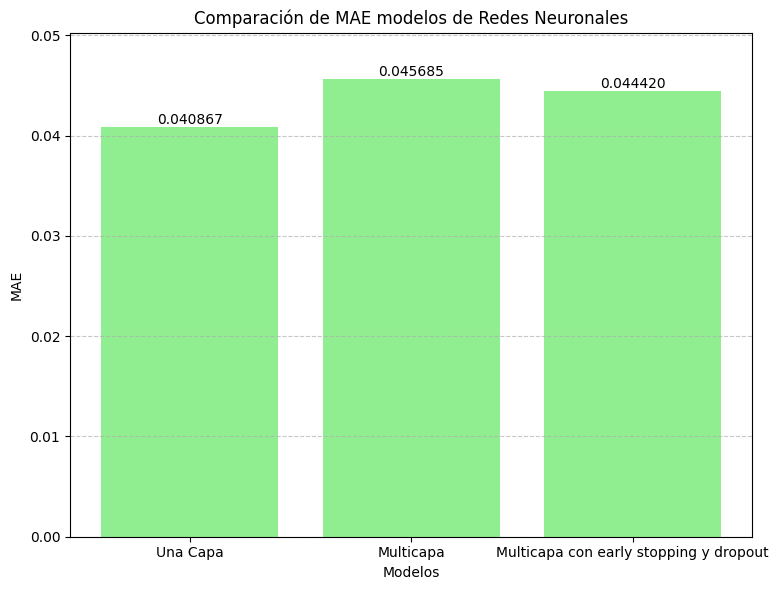

In [140]:
# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(["Una Capa","Multicapa", "Multicapa con early stopping y dropout"], [mae_nn_single, mae_nn_multi, mae_nn_dropout], color='lightgreen')

# Agregar etiquetas a las barras
for i, valor in enumerate([mae_nn_single, mae_nn_multi, mae_nn_dropout]):
    plt.text(i, valor, f'{valor:.6f}', ha='center', va='bottom')

# Títulos y etiquetas
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparación de MAE modelos de Redes Neuronales')
plt.ylim(0, max([mae_nn_single, mae_nn_multi, mae_nn_dropout]) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

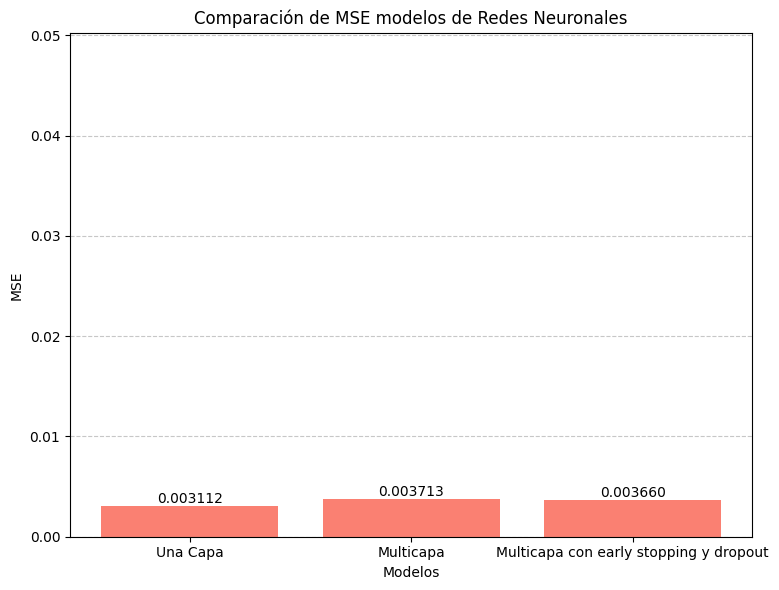

In [141]:
# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(["Una Capa","Multicapa", "Multicapa con early stopping y dropout"], [mse_nn_single, mse_nn_multi, mse_nn_dropout], color='salmon')

# Agregar etiquetas a las barras
for i, valor in enumerate([mse_nn_single, mse_nn_multi, mse_nn_dropout]):
    plt.text(i, valor, f'{valor:.6f}', ha='center', va='bottom')

# Títulos y etiquetas
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparación de MSE modelos de Redes Neuronales')
plt.ylim(0, max([mae_nn_single, mae_nn_multi, mae_nn_dropout]) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Conclusiones

*   El modelo de una sola capa tiene el mejor modelo predictivo para este problema. Esto puede deberse a la naturaleza del problema. En los datos vemos que podría existir una **linealidad** entre ellos, y las redes neuronales existen para resolver problemas más complejos y agregar no linealidad a la solución.

### Ventajas Red Neuronal de Una Sola Capa
* Para problemas con estructuras lineales, como el que se presenta aquí, una sola capa puede ser suficiente para capturar la relación entre las variables de entrada y la variable de salida.
* La simplicidad del modelo de una sola capa puede conducir a un entrenamiento más rápido y a una mayor interpretabilidad del modelo.

### Desventajas Red Neuronal Multicapa
* El modelo multicapa no muestra una mejora significativa en el rendimiento en comparación con el modelo de una sola capa para este problema específico, lo que sugiere que la adición de capas no proporciona beneficios sustanciales en términos de precisión de la predicción.
* El aumento en la complejidad del modelo multicapa puede llevar a un mayor tiempo de entrenamiento y una mayor propensión al sobreajuste, especialmente en conjuntos de datos pequeños o problemas lineales.

### Conclusiones adicionales sobre el modelo multicapa con dropout y early stopping:

* La inclusión de dropout y early stopping en el modelo multicapa ha mejorado ligeramente el rendimiento en comparación con el modelo multicapa sin estas técnicas.
El early stopping detuvo el entrenamiento en la época 166, lo que sugiere que el modelo alcanzó su capacidad máxima de generalización en ese punto y que continuar el entrenamiento no proporcionaría una mejora adicional en la precisión de la predicción.
* Aunque el modelo multicapa con dropout y early stopping supera al modelo multicapa básico, aún no logra superar al modelo de una sola capa en términos de precisión de la predicción, lo que indica que l**a complejidad adicional del modelo multicapa no es necesaria para este problema específico.**
